# Discussion of Return Decomposition
## in the Context of Homework 2: Proshares ETF
### Mark Hendricks

In [1]:
import numpy as np
import pandas as pd
pd.options.display.float_format = "{:,.4f}".format

import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm
from sklearn.linear_model import LinearRegression

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (12,6)
plt.rcParams['font.size'] = 15
plt.rcParams['legend.fontsize'] = 13

# Some Useful Functions

## This notebook relies on some functions, kept in `cmds/portfolio.py`

It calls the path to `portfolio.py` then it loads all the functions from `portfolio.py`.

In [3]:
import sys
sys.path.insert(0, '../cmds')
from portfolio import *

# Data

In [4]:
filepath_data = '../data/proshares_analysis_data.xlsx'
info = pd.read_excel(filepath_data,sheet_name='descriptions')
info.rename(columns={'Unnamed: 0':'Symbol'},inplace=True)
info.set_index('Symbol',inplace=True)

hf = pd.read_excel(filepath_data,sheet_name='hedge_fund_series')
hf = hf.rename(columns={'Unnamed: 0':'date'}).set_index('date')

ml = pd.read_excel(filepath_data,sheet_name='merrill_factors')
ml = ml.rename(columns={'Unnamed: 0':'date'}).set_index('date')

In [5]:
info.loc[list(hf.columns) + list(ml.columns)]

,security_name
Symbol,
HFRIFWI Index,HFR Fund Wghted Comp
MLEIFCTR Index,Merrill Lynch Factor Model Ind
MLEIFCTX Index,Merrill Lynch Factor Model Exc
HDG US Equity,ProShares Hedge Replication ET
QAI US Equity,IndexIQ ETF Trust - IQ Hedge M
SPY US Equity,SPDR S&P 500 ETF Trust
USGG3M Index,US Generic Govt 3 Mth
EEM US Equity,iShares MSCI Emerging Markets
EFA US Equity,iShares MSCI EAFE ETF


In [6]:
hf

,HFRIFWI Index,MLEIFCTR Index,MLEIFCTX Index,HDG US Equity,QAI US Equity
date,,,,,
2011-08-31,-0.0321,-0.0256,-0.0257,-0.0270,-0.0065
2011-09-30,-0.0389,-0.0324,-0.0326,-0.0325,-0.0221
2011-10-31,0.0269,0.0436,0.0433,0.0505,0.0252
2011-11-30,-0.0135,-0.0121,-0.0124,-0.0286,-0.0080
2011-12-31,-0.0045,0.0019,0.0018,0.0129,0.0018
...,...,...,...,...,...
2022-05-31,-0.0054,0.0033,0.0037,0.0049,-0.0040
2022-06-30,-0.0285,-0.0288,-0.0292,-0.0321,-0.0337
2022-07-31,0.0127,0.0216,0.0211,0.0202,0.0188


In [7]:
ml

,SPY US Equity,USGG3M Index,EEM US Equity,EFA US Equity,EUO US Equity,IWM US Equity
date,,,,,,
2011-08-31,-0.0550,0.0000,-0.0925,-0.0875,-0.0059,-0.0889
2011-09-30,-0.0694,0.0000,-0.1791,-0.1081,0.1422,-0.1115
2011-10-31,0.1091,-0.0000,0.1630,0.0963,-0.0695,0.1510
2011-11-30,-0.0041,0.0000,-0.0197,-0.0218,0.0546,-0.0038
2011-12-31,0.0104,0.0000,-0.0426,-0.0217,0.0756,0.0051
...,...,...,...,...,...,...
2022-05-31,0.0023,0.0009,0.0061,0.0200,-0.0364,0.0019
2022-06-30,-0.0825,0.0014,-0.0516,-0.0877,0.0504,-0.0837
2022-07-31,0.0921,0.0019,-0.0035,0.0517,0.0523,0.1056


In [8]:
mlx = ml.subtract(ml['USGG3M Index'], axis=0)
mlx = mlx.drop(columns=['USGG3M Index'])
mlx

,SPY US Equity,EEM US Equity,EFA US Equity,EUO US Equity,IWM US Equity
date,,,,,
2011-08-31,-0.0550,-0.0926,-0.0876,-0.0059,-0.0889
2011-09-30,-0.0694,-0.1791,-0.1081,0.1422,-0.1115
2011-10-31,0.1092,0.1630,0.0963,-0.0695,0.1510
2011-11-30,-0.0041,-0.0197,-0.0218,0.0546,-0.0038
2011-12-31,0.0104,-0.0427,-0.0218,0.0756,0.0051
...,...,...,...,...,...
2022-05-31,0.0014,0.0053,0.0191,-0.0373,0.0011
2022-06-30,-0.0838,-0.0529,-0.0890,0.0491,-0.0850
2022-07-31,0.0902,-0.0054,0.0498,0.0504,0.1037


### Familiarize ourselves with the factor data

In [9]:
performanceMetrics(ml,annualization=12)

,Mean,Vol,Sharpe,Min,Max
SPY US Equity,0.1213,0.1456,0.8327,-0.1249,0.1270
USGG3M Index,0.0062,0.0024,2.5335,-0.0000,0.0027
EEM US Equity,0.0100,0.1815,0.0551,-0.1791,0.1630
EFA US Equity,0.0372,0.1518,0.2450,-0.1411,0.1427
EUO US Equity,0.0764,0.1551,0.4925,-0.0909,0.1442
IWM US Equity,0.0982,0.1928,0.5092,-0.2148,0.1824


MIN Correlation pair is ('EUO US Equity', 'EEM US Equity')
MAX Correlation pair is ('IWM US Equity', 'SPY US Equity')


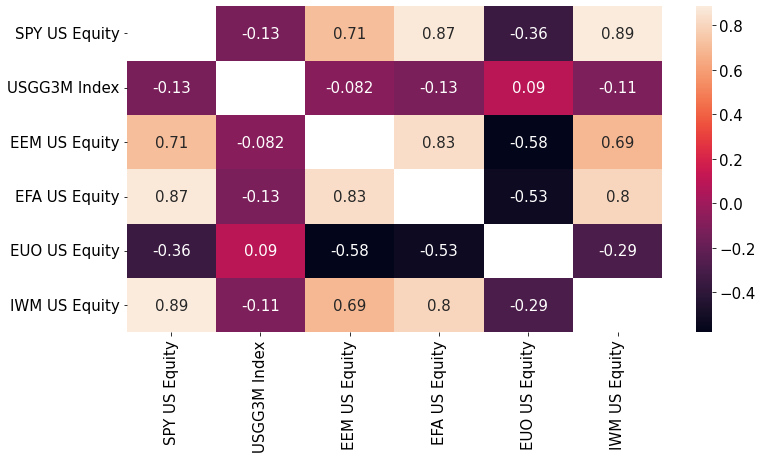

In [10]:
display_correlation(ml)

# 2.1-2.3, 2.5 Hedge-Fund Metrics

In [11]:
performanceMetrics(hf,annualization=12)

,Mean,Vol,Sharpe,Min,Max
HFRIFWI Index,0.0429,0.0609,0.7038,-0.0908,0.0586
MLEIFCTR Index,0.0257,0.0569,0.4513,-0.0532,0.0589
MLEIFCTX Index,0.0243,0.0567,0.4283,-0.0524,0.0588
HDG US Equity,0.0140,0.0592,0.2365,-0.0592,0.0583
QAI US Equity,0.0116,0.0489,0.2366,-0.0563,0.0341


In [12]:
tailMetrics(hf)

,Skewness,Kurtosis,VaR (0.05),CVaR (0.05),Max Drawdown,Peak,Bottom,Recover,Duration (to Recover)
HFRIFWI Index,-1.0207,6.1631,-0.0256,-0.0392,-0.1155,2019-12-31,2020-03-31,2020-08-31,244 days
MLEIFCTR Index,-0.3155,1.7787,-0.0297,-0.0369,-0.1243,2021-06-30,2022-09-30,NaT,NaT
MLEIFCTX Index,-0.3048,1.7418,-0.0299,-0.0368,-0.1244,2021-06-30,2022-09-30,NaT,NaT
HDG US Equity,-0.2986,1.9311,-0.0315,-0.0385,-0.1407,2021-06-30,2022-09-30,NaT,NaT
QAI US Equity,-0.6341,1.9133,-0.0212,-0.0344,-0.1377,2021-06-30,2022-09-30,NaT,NaT


Note that the hedge-fund series have low volatilities relative to SPY or other securities we have seen. They have relatively low maximum drawdowns as well, (though not particularly low in terms of their volatility.)

Only HDG and QAI are actual returns, the others are indexes. And we note that the returns have much lower Sharpe Ratios than the series.

MIN Correlation pair is ('HFRIFWI Index', 'QAI US Equity')
MAX Correlation pair is ('MLEIFCTX Index', 'MLEIFCTR Index')


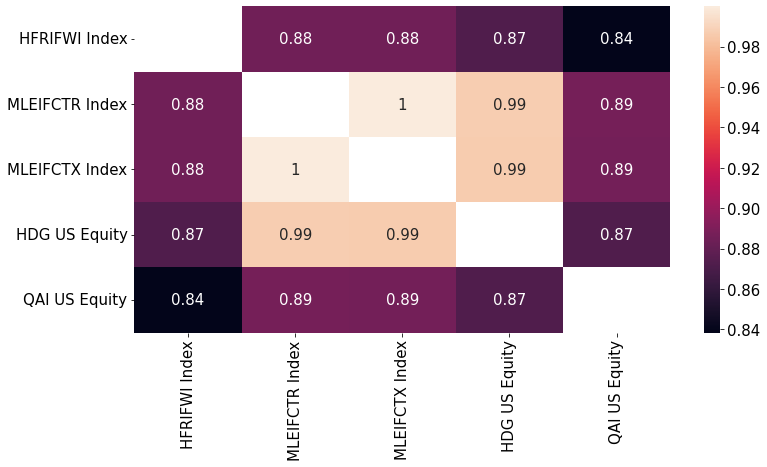

In [13]:
display_correlation(hf)

# 2.3-2.4 Relative Performance

In [14]:
get_ols_metrics(ml['SPY US Equity'],hf,annualization=12)

,alpha,SPY US Equity,r-squared,Treynor Ratio,Info Ratio
HFRIFWI Index,0.0004,0.3500,0.6999,0.1225,0.0130
MLEIFCTR Index,-0.0174,0.3549,0.8257,0.0723,-0.7315
MLEIFCTX Index,-0.0186,0.3536,0.8251,0.0687,-0.7846
HDG US Equity,-0.0300,0.3631,0.7966,0.0386,-1.1237
QAI US Equity,-0.0238,0.2919,0.7550,0.0397,-0.9838


### Note that 
* The alphas are all negative! SPY has been a rocket during this time.
* Hedge-funds (as measured by these broad indexes) have underperformed.
* Given that they have some SPY beta, their total return is positive (Sharpe is positive) but when we strip this factor out, the hedged performance has a negative Sharpe ratio as seen by the Info Ratio (which is the Sharpe Ratio of the hedged position.)

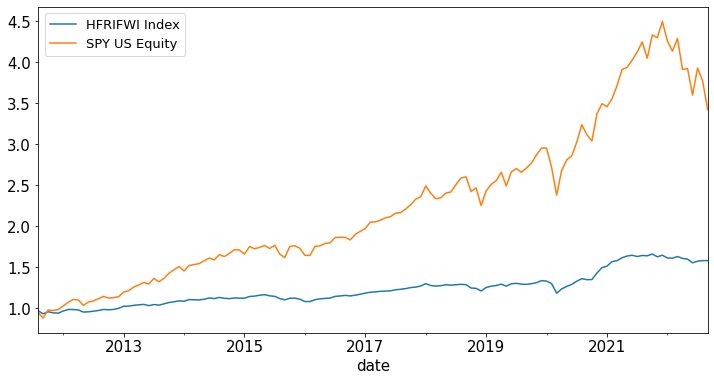

In [15]:
hfri = hf['HFRIFWI Index']
spy = ml['SPY US Equity']

cumrets = (1+pd.concat([hfri,spy],axis=1)).cumprod()
cumrets.plot();

### We see that
* HFRI is much less volatile and a much lower trend.

But maybe the scaling here is hiding how similar they are. Let's re-plot them, adjusting the scales. And we see they are *very* similar!

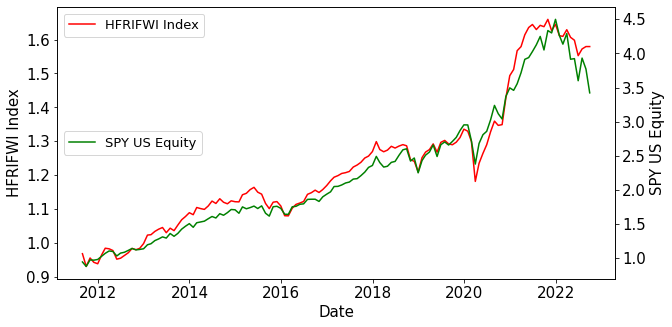

In [16]:
fig, ax1 = plt.subplots(figsize=(10,5))

ax1.set_xlabel('Date')
ax1.set_ylabel(hfri.name)
ax1.plot(hfri.index, (1+hfri).cumprod(), color='r', label=hfri.name)

ax2 = ax1.twinx()  
ax2.set_ylabel(spy.name)  
ax2.plot(spy.index, (1+spy).cumprod(), color='g', label=spy.name)

ax1.legend(loc='upper left')
ax2.legend(loc='center left')
plt.show()

# 2.6 Static Replication

In [17]:
y = hf['HFRIFWI Index']
X = sm.add_constant(ml)
static_model = sm.OLS(y,X).fit()
static_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          HFRIFWI Index   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.813
Method:                 Least Squares   F-statistic:                     97.27
Date:                Fri, 07 Oct 2022   Prob (F-statistic):           4.68e-45
Time:                        09:32:36   Log-Likelihood:                 467.20
No. Observations:                 134   AIC:                            -920.4
Df Residuals:                     127   BIC:                            -900.1
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0011      0.001      1.314      0.191      -0.001       0.003
SPY US Equity     0.0256      0.042      0.607      0.545      -0.058       0.109
USGG3M Index      0.8346      0.948      0.880      0.381      -1.042       2.711
EEM US Equity     0.0741      0.024      3.050      0.003       0.026       0.122
EFA US Equity     0.1056      0.041      2.585      0.011       0.025       0.186
EUO US Equity     0.0232      0.019      1.211      0.228      -0.015       0.061
IWM US Equity     0.1474      0.026      5.569      0.000       0.095       0.200
==============================================================================
Omnibus:                       19.616   Durbin-Watson:                   1.711
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               96.415
Skew:                           0.095   Prob(JB):                     1.16e-21
Kurtosis:                       7.151   Cond. No.                     1.44e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.44e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# 2.7 Rolling Replication

In [18]:
from statsmodels.regression.rolling import RollingOLS
model = RollingOLS(y,X,window=60)
rolling_betas = model.fit().params.copy()
rolling_betas

,const,SPY US Equity,USGG3M Index,EEM US Equity,EFA US Equity,EUO US Equity,IWM US Equity
date,,,,,,,
2011-08-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-09-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-10-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-11-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
2022-05-31,0.0041,0.0150,-2.0331,0.1085,0.1152,0.0340,0.1754
2022-06-30,0.0042,0.0113,-2.0093,0.1064,0.1113,0.0286,0.1812
2022-07-31,0.0045,0.0010,-2.3994,0.1183,0.1073,0.0202,0.1765


In [19]:
rep_IS = (rolling_betas * X).sum(axis=1,skipna=False)
rep_OOS = (rolling_betas.shift() * X).sum(axis=1,skipna=False)

In [20]:
replication = hf[['HFRIFWI Index']].copy()
replication['Static-IS-Int'] = static_model.fittedvalues

replication['Rolling-IS-Int'] = rep_IS
replication['Rolling-OOS-Int'] = rep_OOS

replication

,HFRIFWI Index,Static-IS-Int,Rolling-IS-Int,Rolling-OOS-Int
date,,,,
2011-08-31,-0.0321,-0.0296,NaN,NaN
2011-09-30,-0.0389,-0.0384,NaN,NaN
2011-10-31,0.0269,0.0468,NaN,NaN
2011-11-30,-0.0135,-0.0020,NaN,NaN
2011-12-31,-0.0045,-0.0015,NaN,NaN
...,...,...,...,...
2022-05-31,-0.0054,0.0039,0.0044,0.0049
2022-06-30,-0.0285,-0.0241,-0.0284,-0.0286
2022-07-31,0.0127,0.0271,0.0248,0.0274


In [21]:
replication.corr()

,HFRIFWI Index,Static-IS-Int,Rolling-IS-Int,Rolling-OOS-Int
HFRIFWI Index,1.0000,0.9062,0.9302,0.8874
Static-IS-Int,0.9062,1.0000,0.9900,0.9866
Rolling-IS-Int,0.9302,0.9900,1.0000,0.9933
Rolling-OOS-Int,0.8874,0.9866,0.9933,1.0000


# 2.8 Replication w/o Intercept

In [22]:
Xnoint = ml
static_model_noint = sm.OLS(y,Xnoint).fit()
betas = pd.DataFrame(static_model.params,columns=['Yes Intercept']).T
betas.loc['No Intercept'] = static_model_noint.params
betas

,const,SPY US Equity,USGG3M Index,EEM US Equity,EFA US Equity,EUO US Equity,IWM US Equity
Yes Intercept,0.0011,0.0256,0.8346,0.0741,0.1056,0.0232,0.1474
No Intercept,NaN,0.0404,1.5517,0.0731,0.1008,0.0249,0.1444


Without an intercept, the betas are almost identical, except the beta in the 3-month T-bills. The T-bills are such low volatility, they act almost like an intercept. Thus, the regression performance is very similar.

In [23]:
model = RollingOLS(y,Xnoint,window=60,)
rolling_betas = model.fit().params.copy()
rep_IS_noint = (rolling_betas * Xnoint).sum(axis=1,skipna=False)
rep_OOS_noint = (rolling_betas.shift() * Xnoint).sum(axis=1,skipna=False)

In [24]:
replication['Static-IS-NoInt'] = static_model_noint.fittedvalues
replication['Rolling-IS-NoInt'] = rep_IS_noint
replication['Rolling-OOS-NoInt'] = rep_OOS_noint
replication

,HFRIFWI Index,Static-IS-Int,Rolling-IS-Int,Rolling-OOS-Int,Static-IS-NoInt,Rolling-IS-NoInt,Rolling-OOS-NoInt
date,,,,,,,
2011-08-31,-0.0321,-0.0296,NaN,NaN,-0.0308,NaN,NaN
2011-09-30,-0.0389,-0.0384,NaN,NaN,-0.0393,NaN,NaN
2011-10-31,0.0269,0.0468,NaN,NaN,0.0461,NaN,NaN
2011-11-30,-0.0135,-0.0020,NaN,NaN,-0.0030,NaN,NaN
2011-12-31,-0.0045,-0.0015,NaN,NaN,-0.0022,NaN,NaN
...,...,...,...,...,...,...,...
2022-05-31,-0.0054,0.0039,0.0044,0.0049,0.0033,0.0023,0.0027
2022-06-30,-0.0285,-0.0241,-0.0284,-0.0286,-0.0247,-0.0297,-0.0300
2022-07-31,0.0127,0.0271,0.0248,0.0274,0.0282,0.0271,0.0298


In [25]:
performanceMetrics(replication,annualization=12)

,Mean,Vol,Sharpe,Min,Max
HFRIFWI Index,0.0429,0.0609,0.7038,-0.0908,0.0586
Static-IS-Int,0.0429,0.0552,0.7766,-0.0602,0.0516
Rolling-IS-Int,0.0402,0.0603,0.6657,-0.0664,0.0554
Rolling-OOS-Int,0.0369,0.0587,0.6294,-0.0537,0.0537
Static-IS-NoInt,0.0350,0.0556,0.6303,-0.0617,0.0507
Rolling-IS-NoInt,0.0366,0.0611,0.5992,-0.0660,0.0549
Rolling-OOS-NoInt,0.0338,0.0598,0.5649,-0.0543,0.0534


In [26]:
tailMetrics(replication)

,Skewness,Kurtosis,VaR (0.05),CVaR (0.05),Max Drawdown,Peak,Bottom,Recover,Duration (to Recover)
HFRIFWI Index,-1.0207,6.1631,-0.0256,-0.0392,-0.1155,2019-12-31,2020-03-31,2020-08-31,244 days
Static-IS-Int,-0.5334,2.1449,-0.0254,-0.0343,-0.0912,2019-12-31,2020-03-31,2020-08-31,244 days
Rolling-IS-Int,-0.8017,3.4326,-0.0275,-0.0390,-0.0965,2019-12-31,2020-03-31,2020-08-31,244 days
Rolling-OOS-Int,-0.6176,2.0603,-0.0277,-0.0383,-0.0975,2021-12-31,2022-09-30,NaT,NaT
Static-IS-NoInt,-0.5329,2.1453,-0.0264,-0.0349,-0.0933,2019-12-31,2020-03-31,2020-11-30,335 days
Rolling-IS-NoInt,-0.7707,3.0817,-0.0286,-0.0395,-0.1005,2021-06-30,2022-09-30,NaT,NaT
Rolling-OOS-NoInt,-0.6076,1.8578,-0.0283,-0.0393,-0.1116,2021-06-30,2022-09-30,NaT,NaT


MIN Correlation pair is ('HFRIFWI Index', 'Rolling-OOS-NoInt')
MAX Correlation pair is ('Static-IS-Int', 'Static-IS-NoInt')


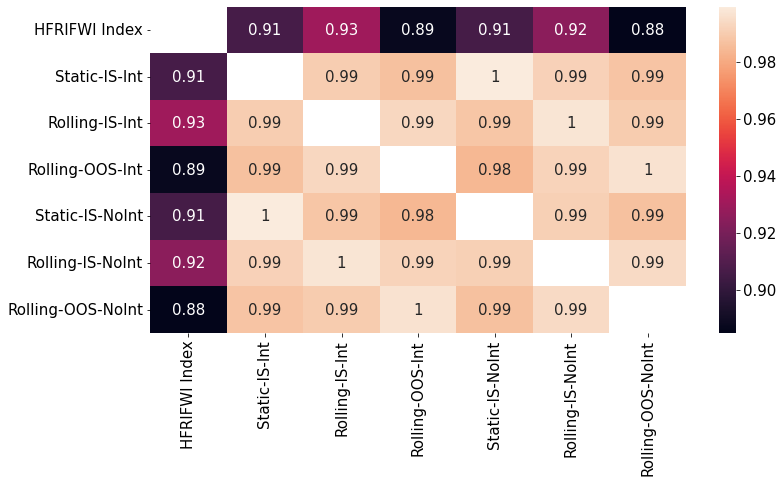

In [27]:
display_correlation(replication)

## Without the intercept
these replications are almost the same. 
* Their correlations are very high to the with-intercept versions.
* The means and other performance statistics are quite similar.

This is not always the case. The reason we get similar results with or without the intercept is due to the fact that the target has a low mean return relative to the instruments.

Just for illustration, let's look at replicating SPY with the non-SPY ML factors both with and without an intercept.

In [28]:
rep_spy = ml[['SPY US Equity']].copy()

model = sm.OLS(ml['SPY US Equity'],sm.add_constant(ml.drop(columns=['SPY US Equity'])))
rep_spy['Static-IS-Int'] = model.fit().fittedvalues
model = sm.OLS(ml['SPY US Equity'],ml.drop(columns=['SPY US Equity']))
rep_spy['Static-IS-NoInt'] = model.fit().fittedvalues
performanceMetrics(rep_spy,annualization=12)

,Mean,Vol,Sharpe,Min,Max
SPY US Equity,0.1213,0.1456,0.8327,-0.1249,0.1270
Static-IS-Int,0.1213,0.1352,0.8972,-0.1419,0.1428
Static-IS-NoInt,0.0804,0.1369,0.5874,-0.1508,0.1408


We see that replicating SPY without an intercept loses a significant amount of the mean return and Sharpe--even though one of the replicating instruments (IWM) is highly correlated to SPY with a high mean!

# Extensions - Constrained Regression

## Non-Negative Betas

In [29]:
reg_nnls = LinearRegression(positive=True,fit_intercept=True)
mod = reg_nnls.fit(Xnoint, y)
betas.loc['Yes intercept: NNLS',Xnoint.columns] =  + mod.coef_
betas.loc['Yes intercept: NNLS','const'] = mod.intercept_
betas

,const,SPY US Equity,USGG3M Index,EEM US Equity,EFA US Equity,EUO US Equity,IWM US Equity
Yes Intercept,0.0011,0.0256,0.8346,0.0741,0.1056,0.0232,0.1474
No Intercept,NaN,0.0404,1.5517,0.0731,0.1008,0.0249,0.1444
Yes intercept: NNLS,0.0011,0.0256,0.8346,0.0741,0.1056,0.0232,0.1474


## Similar to unconstrained

The unconstrained estimate shorted treasury bills, which are extremely low volatility.
The constrained estimate simply zeros out the t-bill exposure, ye tthis does not impact the total result much.

In [30]:
replication['Static-IS-Int-NNLS'] = mod.predict(Xnoint)
corr_nnls = replication.corr().loc['Static-IS-Int-NNLS','Static-IS-Int']
print(f'Correlation between unconstrained and constrained is {corr_nnls:0.4f}')

Correlation between unconstrained and constrained is 1.0000


## Constrained by coefficient-specific inequalities

We will likely discuss this later.

# Extensions - More Style Analysis

In [31]:
data = pd.read_excel(filepath_data,sheet_name='other_data')
data = data.rename(columns={'Unnamed: 0':'date'}).set_index('date')
data.drop(columns=['SPXU US Equity','UPRO US Equity'],inplace=True)

info.loc[data.columns]

,security_name
TRVCI Index,Refinitiv Venture Capital Inde
HEFA US Equity,iShares Currency Hedged MSCI E
TAIL US Equity,Cambria Tail Risk ETF


In [32]:
performanceMetrics(data,annualization=12)

,Mean,Vol,Sharpe,Min,Max
TRVCI Index,0.1959,0.2685,0.7296,-0.2422,0.1864
HEFA US Equity,0.0643,0.1259,0.5109,-0.1316,0.1234
TAIL US Equity,-0.0535,0.1239,-0.4320,-0.0891,0.1140


In [33]:
tailMetrics(data)

,Skewness,Kurtosis,VaR (0.05),CVaR (0.05),Max Drawdown,Peak,Bottom,Recover,Duration (to Recover)
TRVCI Index,-0.4607,0.3868,-0.1107,-0.1582,-0.6034,2021-08-31,2022-09-30,NaN,None
HEFA US Equity,-0.5463,1.9466,-0.0582,-0.0781,-0.2066,2019-12-31,2020-03-31,2020-12-31 00:00:00,None
TAIL US Equity,1.1455,2.6899,-0.0465,-0.0630,-0.3036,2017-05-31,2022-08-31,None,None


MIN Correlation pair is ('HEFA US Equity', 'TAIL US Equity')
MAX Correlation pair is ('SPY US Equity', 'HEFA US Equity')


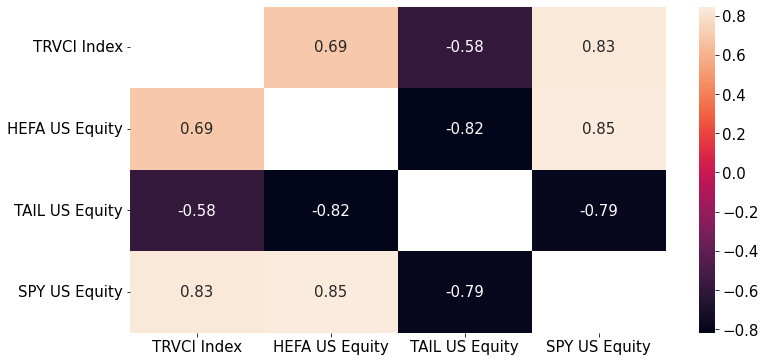

In [34]:
display_correlation(data.join(ml['SPY US Equity']))

In [35]:
get_ols_metrics(ml,data,annualization=12)

,alpha,SPY US Equity,USGG3M Index,EEM US Equity,EFA US Equity,EUO US Equity,IWM US Equity,r-squared,Info Ratio
TRVCI Index,-0.0334,1.8552,5.2206,-0.1309,0.0264,-0.0804,-0.2178,0.6970,-0.2261
HEFA US Equity,0.0156,-0.0042,0.0738,-0.0580,0.9647,0.3224,0.0163,0.9686,0.6974
TAIL US Equity,0.0139,-0.2637,-0.3893,-0.1385,-0.1766,-0.3179,-0.1196,0.7208,0.2128


# Extensions - Levered ETFs

See other notebook